<a href="https://colab.research.google.com/github/qzzt1n4/Basys3_LogicGateLab/blob/main/Basys3_LogicGate_Grp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("[INFO]: Init the Verilog ENV")
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

[INFO]: Init the Verilog ENV
The plugin extension is already loaded. To reload it, use:
  %reload_ext plugin


Module Verilog Code

In [ ]:
%%verilog
module top_module(

input [1:0] sw,
output [7:0] led

    );

    assign led[0] = ~sw[0];
    assign led[1] = ~(~sw[1]);
    assign led[2] = sw[0] & sw[1];
    assign led[3] = sw[0] | sw[1];
    assign led[4] = ~(sw[0] | sw[1]);
    assign led[5] = ~(sw[0] & sw[1]);
    assign led[6] = sw[0] ^ sw[1];
    assign led[7] = ~(sw[0]^sw[1]);

endmodule

Testbench Code

In [ ]:
%%verilog
module top_module(

input [1:0] sw,
output [7:0] led

    );

    assign led[0] = ~sw[0];
    assign led[1] = ~(~sw[1]);
    assign led[2] = sw[0] & sw[1];
    assign led[3] = sw[0] | sw[1];
    assign led[4] = ~(sw[0] | sw[1]);
    assign led[5] = ~(sw[0] & sw[1]);
    assign led[6] = sw[0] ^ sw[1];
    assign led[7] = ~(sw[0]^sw[1]);

endmodule


module tb1;

reg [1:0] sw;
wire [7:0] led;

top_module uut (sw, led);

initial begin

    $dumpfile("tb1.vcd");
    $dumpvars;

    sw = 2'b00;
    #5 sw = 2'b01;
    #5 sw = 2'b10;
    #5 sw = 2'b11;
    #5 $finish();
    $dumpoff;

end

endmodule

VCD info: dumpfile tb1.vcd opened for output.



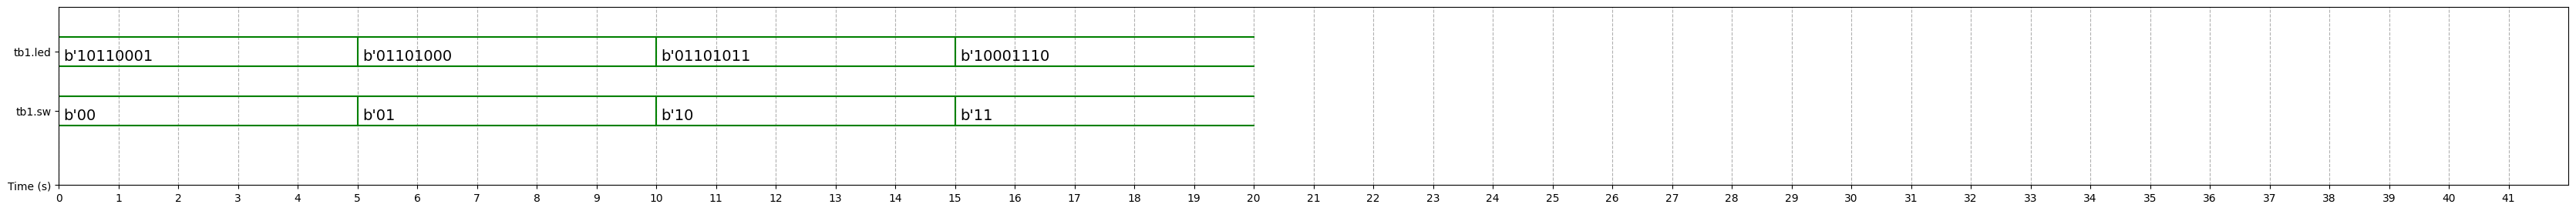

In [ ]:
%%waveform tb1.vcd
sign_list = ['tb1.led','tb1.sw']
time_begin = 0
time_end = 41
base = 'bin'

Waveform Generator

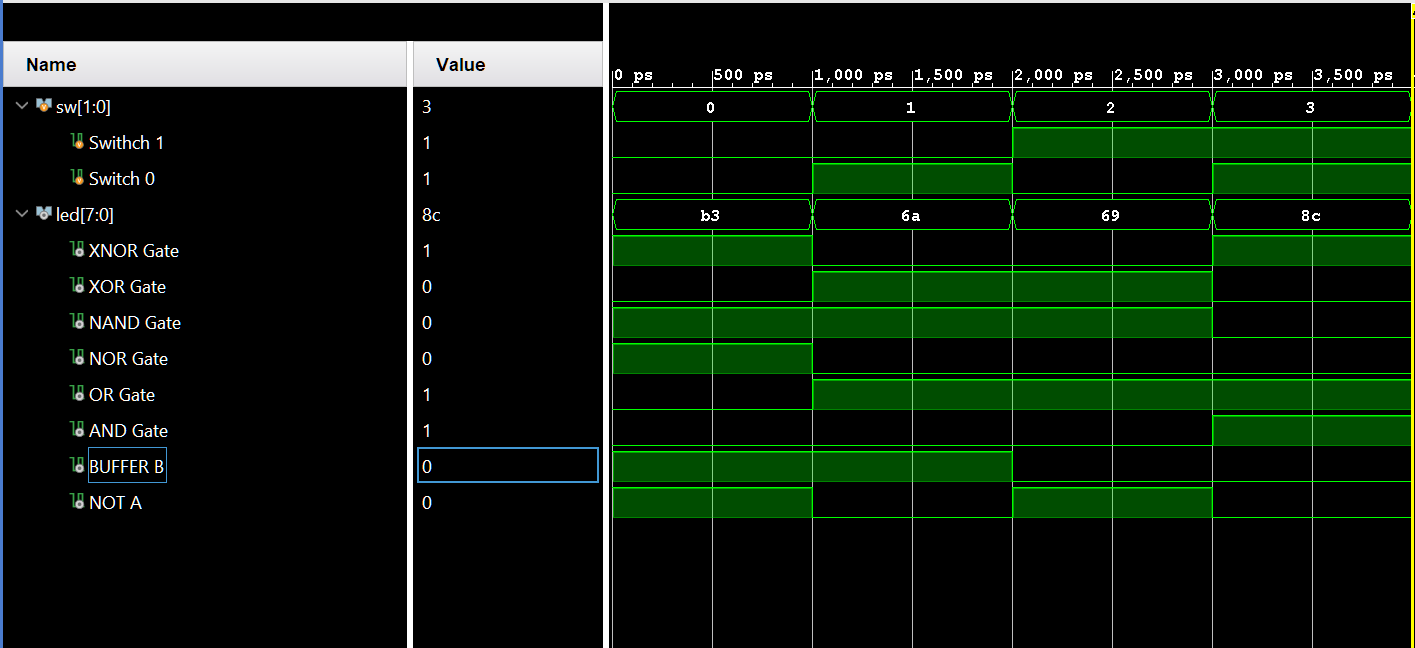